In [80]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)



# load the dataset
dataframe = pandas.read_csv('D:\SourceFiles/carrotPop.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [81]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [82]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

32 17


In [83]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [84]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [85]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [86]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0419
Epoch 2/100
 - 0s - loss: 0.0315
Epoch 3/100
 - 0s - loss: 0.0241
Epoch 4/100
 - 0s - loss: 0.0199
Epoch 5/100
 - 0s - loss: 0.0168
Epoch 6/100
 - 0s - loss: 0.0152
Epoch 7/100
 - 0s - loss: 0.0144
Epoch 8/100
 - 0s - loss: 0.0137
Epoch 9/100
 - 0s - loss: 0.0133
Epoch 10/100
 - 0s - loss: 0.0131
Epoch 11/100
 - 0s - loss: 0.0128
Epoch 12/100
 - 0s - loss: 0.0126
Epoch 13/100
 - 0s - loss: 0.0124
Epoch 14/100
 - 0s - loss: 0.0123
Epoch 15/100
 - 0s - loss: 0.0121
Epoch 16/100
 - 0s - loss: 0.0119
Epoch 17/100
 - 0s - loss: 0.0116
Epoch 18/100
 - 0s - loss: 0.0115
Epoch 19/100
 - 0s - loss: 0.0112
Epoch 20/100
 - 0s - loss: 0.0110
Epoch 21/100
 - 0s - loss: 0.0109
Epoch 22/100
 - 0s - loss: 0.0107
Epoch 23/100
 - 0s - loss: 0.0104
Epoch 24/100
 - 0s - loss: 0.0102
Epoch 25/100
 - 0s - loss: 0.0101
Epoch 26/100
 - 0s - loss: 0.0098
Epoch 27/100
 - 0s - loss: 0.0096
Epoch 28/100
 - 0s - loss: 0.0094
Epoch 29/100
 - 0s - loss: 0.0092
Epoch 30/100
 - 0s - lo

In [87]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 20.80 RMSE
Test Score: 53.70 RMSE


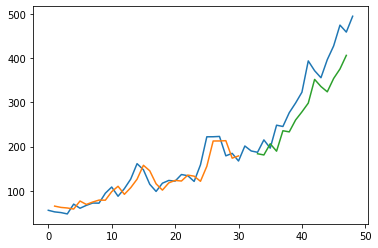

In [88]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [92]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=12)

In [93]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

ValueError: Error when checking input: expected lstm_7_input to have shape (1, 1) but got array with shape (12, 1)